In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/loan_dataset.csv')  
df.head()

,Unnamed: 0,ID,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,10001,110001,23,4.0,Under Graduate,1.0,392000,0,no,yes,no,no
1,1,10002,110014,43,3.0,Under Graduate,19.0,272000,0,no,yes,no,no
2,2,10003,110014,37,1.0,Under Graduate,15.0,88000,0,no,no,no,no
3,3,10004,110003,33,1.0,Graduate,9.0,800000,0,no,no,no,no
4,4,10005,110004,33,4.0,Graduate,8.0,360000,0,no,no,no,no


In [ ]:
df.shape       

(5000, 13)

In [ ]:
# Check if there are any NULL values.
df.isnull().sum()

Unnamed: 0       0
ID               0
Pin-code         0
age              0
Fam members      0
Education        0
T.Experience     0
Income           0
Mortgage         0
Fixed Deposit    0
Demat            0
Net Banking      0
Loan             0
dtype: int64

In [ ]:
df.dtypes    

Unnamed: 0         int64
ID                 int64
Pin-code           int64
age                int64
Fam members      float64
Education         object
T.Experience     float64
Income             int64
Mortgage           int64
Fixed Deposit     object
Demat             object
Net Banking       object
Loan              object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     5000 non-null   int64  
 1   ID             5000 non-null   int64  
 2   Pin-code       5000 non-null   int64  
 3   age            5000 non-null   int64  
 4   Fam members    5000 non-null   float64
 5   Education      5000 non-null   object 
 6   T.Experience   5000 non-null   float64
 7   Income         5000 non-null   int64  
 8   Mortgage       5000 non-null   int64  
 9   Fixed Deposit  5000 non-null   object 
 10  Demat          5000 non-null   object 
 11  Net Banking    5000 non-null   object 
 12  Loan           5000 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 507.9+ KB


In [ ]:
# Check categorical attributes
features = list(df.columns)
features.remove('Loan')

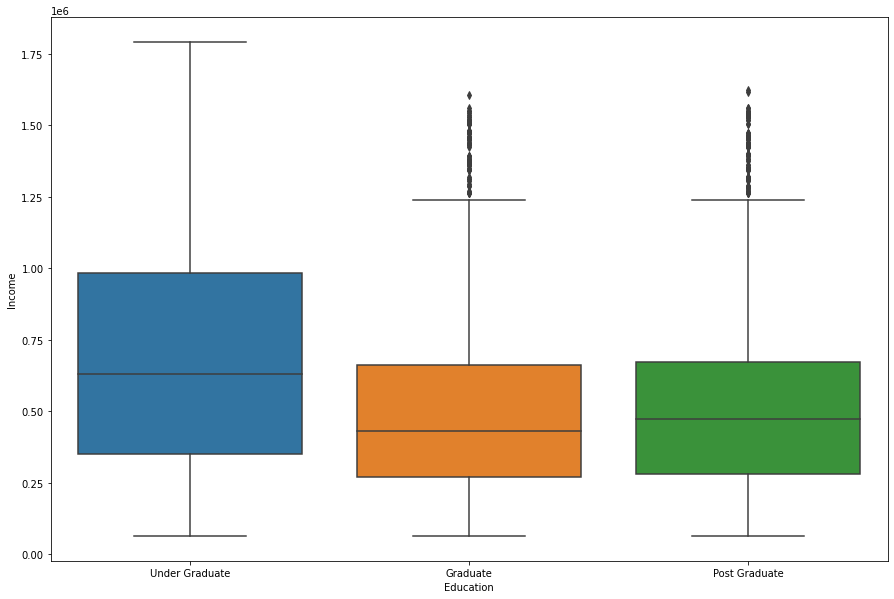

In [ ]:
# Boxplot for 'Education' vs 'Income'
plt.figure(figsize=(15,10))
sns.boxplot(x=df['Education'],y=df['Income'])
plt.show()

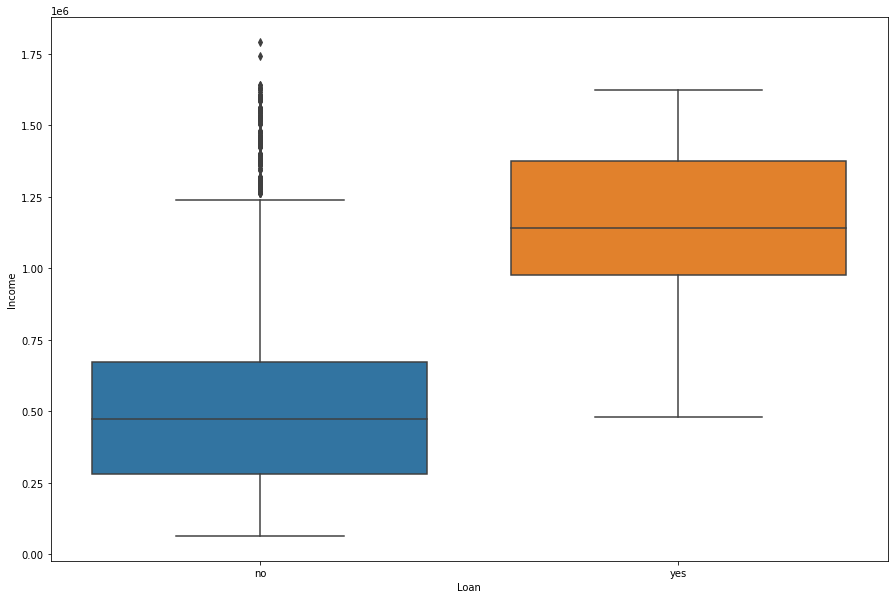

In [ ]:
# Boxplot for 'Loan' vs 'Income'
plt.figure(figsize=(15,10))
sns.boxplot(x=df['Loan'],y=df['Income'])
plt.show()

In [ ]:
words_dict = {'yes':1,'no':0}
def num_map(series):
    return series.map(words_dict)

In [ ]:
df[['Loan','Fixed Deposit','Demat','Net Banking']]=df[['Loan','Fixed Deposit','Demat','Net Banking']].apply(num_map, axis = 1)

In [ ]:
words_dict1={'Under Graduate':1,'Graduate':2,'Post Graduate':3}
def num_map1(series):
  return series.map(words_dict1)
df[['Education']]=df[['Education']].apply(num_map1,axis=1)

In [ ]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5000.0,2.499500e+03,1.443520e+03,0.0,1249.75,2499.5,3749.25,4999.0
ID,5000.0,8.186318e+06,3.638026e+06,10001.0,10001250.75,10002500.5,10003750.25,10005000.0
Pin-code,5000.0,1.100066e+05,4.998725e+00,110001.0,110003.00,110004.0,110011.00,110014.0
age,5000.0,4.333840e+01,1.146317e+01,21.0,33.00,43.0,53.00,65.0
Fam members,5000.0,2.396400e+00,1.147663e+00,1.0,1.00,2.0,3.00,4.0
Education,5000.0,1.881000e+00,8.398691e-01,1.0,1.00,2.0,3.00,3.0
T.Experience,5000.0,2.010460e+01,1.146795e+01,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,5.901936e+05,3.682698e+05,64000.0,312000.00,512000.0,784000.00,1792000.0
Mortgage,5000.0,4.519904e+05,8.137104e+05,0.0,0.00,0.0,808000.00,5080000.0
Fixed Deposit,5000.0,6.040000e-02,2.382503e-01,0.0,0.00,0.0,0.00,1.0


In [ ]:
 # Experience has negative values, which is not possible

In [ ]:
df.drop(columns='ID', axis='columns', inplace=True)    # we drop ID column that is not required 

In [ ]:
df[df['T.Experience'] < 0 ]                # show the rows with negetive values of Experience

,Unnamed: 0,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
89,89,110014,23,4.0,3,-1.0,904000,0,0,0,0,0
226,226,110014,22,2.0,2,-1.0,312000,0,0,0,0,0
315,315,110001,22,3.0,3,-2.0,408000,0,0,0,1,0
451,451,110004,26,2.0,3,-2.0,384000,712000,0,0,1,0
524,524,110003,22,4.0,1,-1.0,600000,0,0,0,1,0
536,536,110004,23,3.0,2,-1.0,344000,1408000,0,0,1,0
540,540,110001,23,4.0,3,-1.0,872000,2512000,0,0,1,0
576,576,110014,23,3.0,3,-1.0,384000,0,0,0,0,0
583,583,110011,22,2.0,2,-1.0,304000,0,0,0,1,0
597,597,110001,22,2.0,1,-2.0,1000000,0,0,1,0,0


In [ ]:
df[df['T.Experience'] < 0].groupby(by='age')['T.Experience'].agg(['count','min','max']).T

age,21,22,23,24,26,27
count,12.0,17.0,18.0,1.0,1.0,3.0
min,-3.0,-3.0,-2.0,-1.0,-2.0,-1.0
max,-1.0,-1.0,-1.0,-1.0,-2.0,-1.0


In [ ]:
#there are negative values between 21 and 27

In [ ]:
df[(df['age'] >= 21) & (df['age'] <= 27)].groupby(['age','Education'])['T.Experience'].describe().T

age              21                   22                       23             \
Education         1         2          1        2    3          1          2   
count      7.000000  5.000000  13.000000  8.00000  7.0  23.000000  11.000000   
mean      -1.285714 -2.200000  -0.692308 -0.87500 -2.0   0.521739  -0.272727   
std        0.755929  0.447214   0.947331  0.64087  1.0   0.790257   0.646670   
min       -3.000000 -3.000000  -2.000000 -2.00000 -3.0  -1.000000  -1.000000   
25%       -1.000000 -2.000000  -2.000000 -1.00000 -2.5   0.000000  -1.000000   
50%       -1.000000 -2.000000   0.000000 -1.00000 -2.0   1.000000   0.000000   
75%       -1.000000 -2.000000   0.000000 -0.75000 -2.0   1.000000   0.000000   
max       -1.000000 -2.000000   0.000000  0.00000  0.0   1.000000   1.000000   

age                          24                              25             \
Education          3          1         2          3          1          2   
count      19.000000  30.000000  24.00000  24.000000  39.000000  24.000000   
mean       -0.526316   1.433333   0.75000   0.583333   2.461538   1.666667   
std         0.696692   0.817200   0.84699   0.717282   0.755546   1.049500   
min        -2.000000   0.000000  -1.00000   0.000000   1.000000   0.000000   
25%        -1.000000   1.000000   0.00000   0.000000   2.000000   1.000000   
50%        -1.000000   2.000000   1.00000   0.000000   3.000000   1.500000   
75%         0.000000   2.000000   1.00000   1.000000   3.000000   3.000000   
max         1.000000   2.000000   2.00000   2.000000   3.000000   3.000000   

age                          26                               27             \
Education          3          1          2          3          1          2   
count      28.000000  47.000000  34.000000  22.000000  50.000000  38.000000   
mean        1.392857   3.255319   2.911765   2.409091   4.080000   3.789474   
std         0.994030   0.765225   0.933149   1.181568   0.899887   1.118829   
min         0.000000   2.000000   1.000000  -2.000000   3.000000   2.000000   
25%         1.000000   3.000000   2.000000   2.000000   3.000000   3.000000   
50%         1.000000   3.000000   3.000000   2.500000   4.000000   4.000000   
75%         2.000000   4.000000   4.000000   3.000000   5.000000   5.000000   
max         3.000000   4.000000   4.000000   4.000000   5.000000   5.000000   

age                   
Education          3  
count      35.000000  
mean        3.114286  
std         1.622841  
min        -1.000000  
25%         3.000000  
50%         3.000000  
75%         4.000000  
max         5.000000

In [ ]:
#experience values are all 0 0r negative for 21-24 years
#judging by age and education,the experience has been mistakenly negative

In [ ]:
df.loc[df['T.Experience']<0,'T.Experience'] = np.abs(df['T.Experience'])
df.head()

,Unnamed: 0,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,110001,23,4.0,1,1.0,392000,0,0,1,0,0
1,1,110014,43,3.0,1,19.0,272000,0,0,1,0,0
2,2,110014,37,1.0,1,15.0,88000,0,0,0,0,0
3,3,110003,33,1.0,2,9.0,800000,0,0,0,0,0
4,4,110004,33,4.0,2,8.0,360000,0,0,0,0,0


In [ ]:
df.dtypes

Unnamed: 0         int64
Pin-code           int64
age                int64
Fam members      float64
Education          int64
T.Experience     float64
Income             int64
Mortgage           int64
Fixed Deposit      int64
Demat              int64
Net Banking        int64
Loan               int64
dtype: object

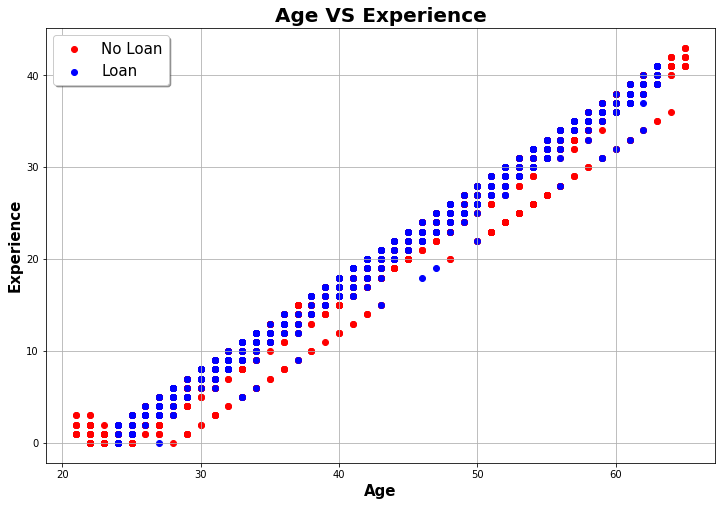

In [ ]:
plt.figure(figsize=(12 , 8))
colors = ['red' , 'blue']
labels =  ['No Loan' , 'Loan']
for color , i , target in zip(colors , [0 , 1] , labels):
    plt.scatter(df[df['Loan'] == i]['age'] , df[df['Loan'] == i]['T.Experience'] , color = color , 
               label = target)
plt.xlabel('Age' , fontweight = 'bold' , fontsize=15)                #xlabel
plt.ylabel('Experience', fontweight = 'bold' , fontsize=15)            #ylabel
plt.title('Age VS Experience' , fontsize=20 , fontweight = 'bold')            # title

plt.legend(loc='best' , shadow=True , scatterpoints=1 , fontsize = 15)
plt.grid()              # Tabulation chart
plt.show()  

In [ ]:
#the age increase ,the amount of experience increases
#people who are older are less likely to accept loan offers

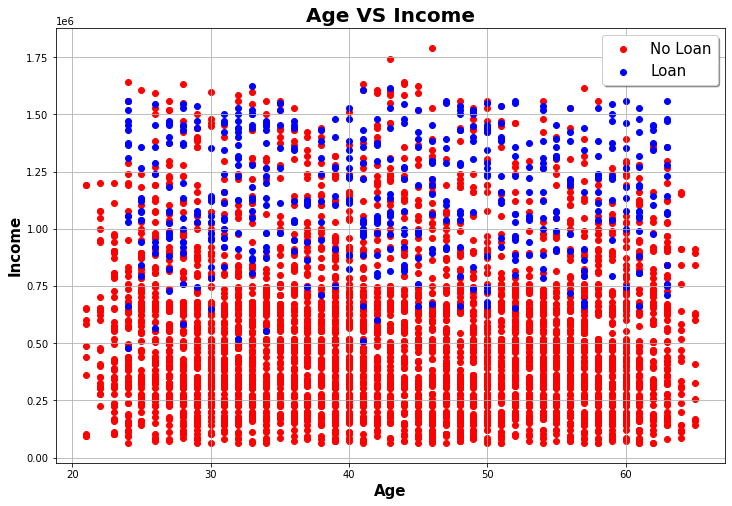

In [ ]:
plt.figure(figsize=(12 , 8))
colors = ['red' , 'blue']
labels =  ['No Loan' , 'Loan']
for color , i , target in zip(colors , [0 , 1] , labels):
    plt.scatter(df[df['Loan'] == i]['age'] , df[df['Loan'] == i]['Income'] , color = color , 
               label = target)
plt.xlabel('Age' , fontweight = 'bold' , fontsize=15)                #xlabel
plt.ylabel('Income', fontweight = 'bold' , fontsize=15)            #ylabel
plt.title('Age VS Income' , fontsize=20 , fontweight = 'bold')            # title

plt.legend(loc='best' , shadow=True , scatterpoints=1 , fontsize = 15)
plt.grid()              # Tabulation chart
plt.show()  

In [ ]:
#as income increses,more people accept loan

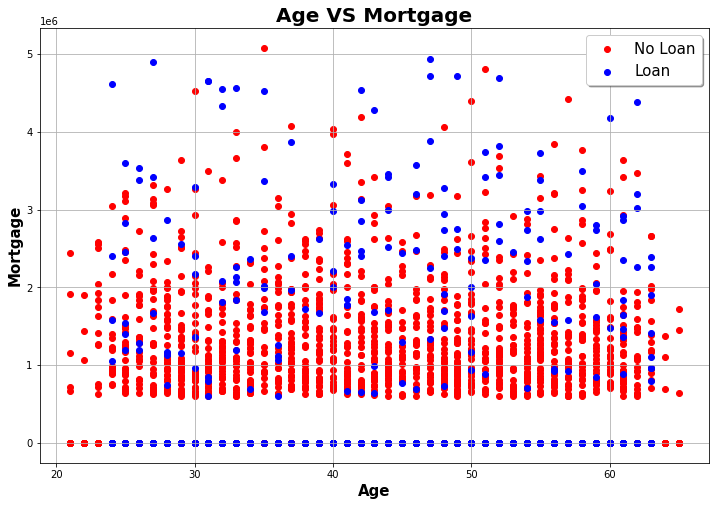

In [ ]:
plt.figure(figsize=(12 , 8))
colors = ['red' , 'blue']
labels =  ['No Loan' , 'Loan']
for color , i , target in zip(colors , [0 , 1] , labels):
    plt.scatter(df[df['Loan'] == i]['age'] , df[df['Loan'] == i]['Mortgage'] , color = color , 
               label = target)
plt.xlabel('Age' , fontweight = 'bold' , fontsize=15)                #xlabel
plt.ylabel('Mortgage', fontweight = 'bold' , fontsize=15)            #ylabel
plt.title('Age VS Mortgage' , fontsize=20 , fontweight = 'bold')            # title

plt.legend(loc='best' , shadow=True , scatterpoints=1 , fontsize = 15)
plt.grid()              # Tabulation chart
plt.show() 

In [ ]:
#people having Mortgage are most likely to accept Loan

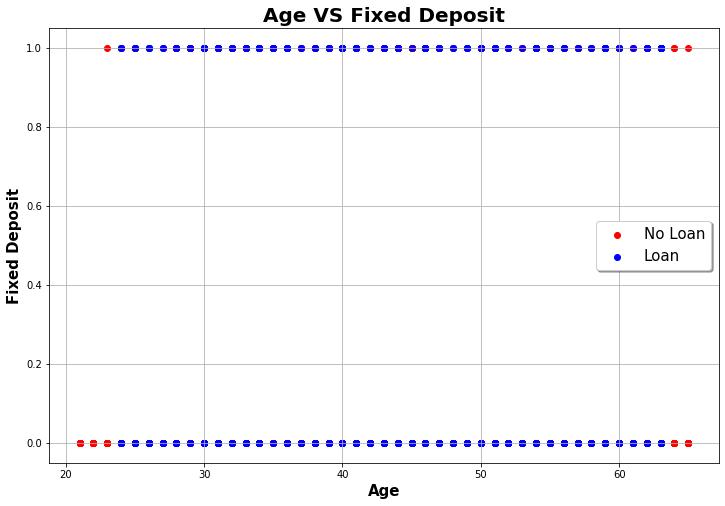

In [ ]:
plt.figure(figsize=(12 , 8))
colors = ['red' , 'blue']
labels =  ['No Loan' , 'Loan']
for color , i , target in zip(colors , [0 , 1] , labels):
    plt.scatter(df[df['Loan'] == i]['age'] , df[df['Loan'] == i]['Fixed Deposit'] , color = color , 
               label = target)
plt.xlabel('Age' , fontweight = 'bold' , fontsize=15)                #xlabel
plt.ylabel('Fixed Deposit', fontweight = 'bold' , fontsize=15)            #ylabel
plt.title('Age VS Fixed Deposit' , fontsize=20 , fontweight = 'bold')            # title

plt.legend(loc='best' , shadow=True , scatterpoints=1 , fontsize = 15)
plt.grid()              # Tabulation chart
plt.show() 

In [ ]:
#people having FD are most likely to accept Loan

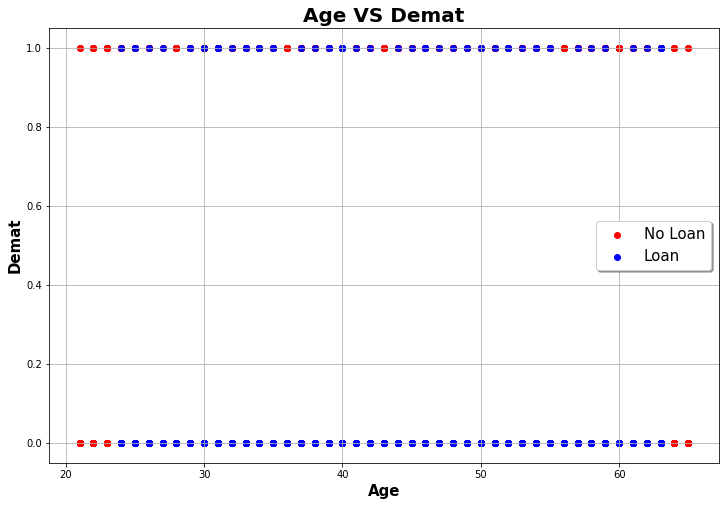

In [ ]:
plt.figure(figsize=(12 , 8))
colors = ['red' , 'blue']
labels =  ['No Loan' , 'Loan']
for color , i , target in zip(colors , [0 , 1] , labels):
    plt.scatter(df[df['Loan'] == i]['age'] , df[df['Loan'] == i]['Demat'] , color = color , 
               label = target)
plt.xlabel('Age' , fontweight = 'bold' , fontsize=15)                #xlabel
plt.ylabel('Demat', fontweight = 'bold' , fontsize=15)            #ylabel
plt.title('Age VS Demat' , fontsize=20 , fontweight = 'bold')            # title

plt.legend(loc='best' , shadow=True , scatterpoints=1 , fontsize = 15)
plt.grid()              # Tabulation chart
plt.show()

In [ ]:
#people having Demat are most likely to accept Loan

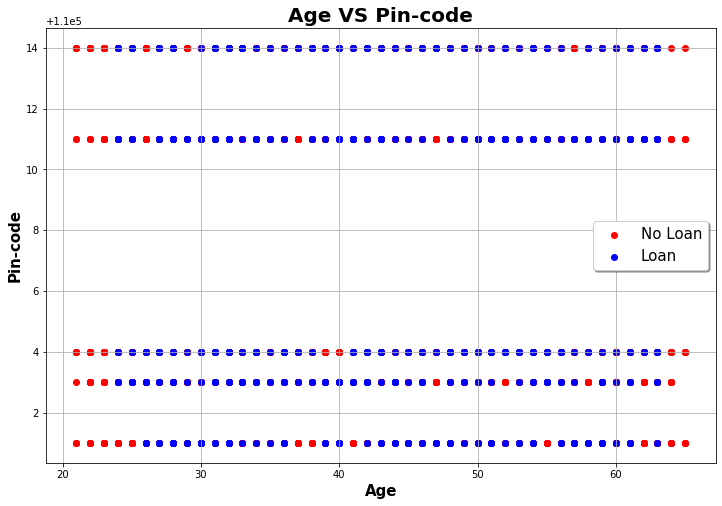

In [ ]:
plt.figure(figsize=(12 , 8))
colors = ['red' , 'blue']
labels =  ['No Loan' , 'Loan']
for color , i , target in zip(colors , [0 , 1] , labels):
    plt.scatter(df[df['Loan'] == i]['age'] , df[df['Loan'] == i]['Pin-code'] , color = color , 
               label = target)
plt.xlabel('Age' , fontweight = 'bold' , fontsize=15)                #xlabel
plt.ylabel('Pin-code', fontweight = 'bold' , fontsize=15)            #ylabel
plt.title('Age VS Pin-code' , fontsize=20 , fontweight = 'bold')            # title

plt.legend(loc='best' , shadow=True , scatterpoints=1 , fontsize = 15)
plt.grid()              # Tabulation chart
plt.show()


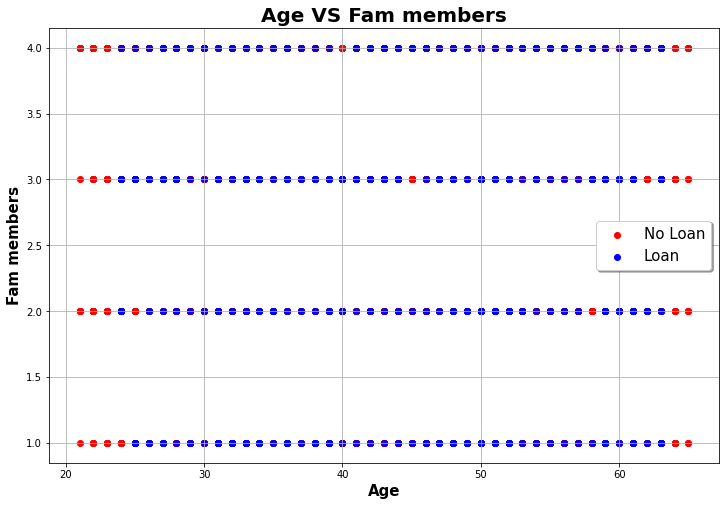

In [ ]:
plt.figure(figsize=(12 , 8))
colors = ['red' , 'blue']
labels =  ['No Loan' , 'Loan']
for color , i , target in zip(colors , [0 , 1] , labels):
    plt.scatter(df[df['Loan'] == i]['age'] , df[df['Loan'] == i]['Fam members'] , color = color , 
               label = target)
plt.xlabel('Age' , fontweight = 'bold' , fontsize=15)                #xlabel
plt.ylabel('Fam members', fontweight = 'bold' , fontsize=15)            #ylabel
plt.title('Age VS Fam members' , fontsize=20 , fontweight = 'bold')            # title

plt.legend(loc='best' , shadow=True , scatterpoints=1 , fontsize = 15)
plt.grid()              # Tabulation chart
plt.show()

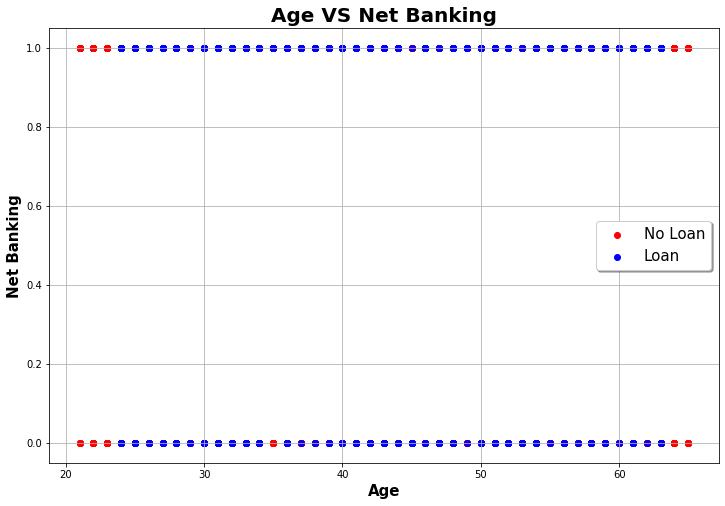

In [ ]:
plt.figure(figsize=(12 , 8))
colors = ['red' , 'blue']
labels =  ['No Loan' , 'Loan']
for color , i , target in zip(colors , [0 , 1] , labels):
    plt.scatter(df[df['Loan'] == i]['age'] , df[df['Loan'] == i]['Net Banking'] , color = color , 
               label = target)
plt.xlabel('Age' , fontweight = 'bold' , fontsize=15)                #xlabel
plt.ylabel('Net Banking', fontweight = 'bold' , fontsize=15)            #ylabel
plt.title('Age VS Net Banking' , fontsize=20 , fontweight = 'bold')            # title

plt.legend(loc='best' , shadow=True , scatterpoints=1 , fontsize = 15)
plt.grid()              # Tabulation chart
plt.show()

In [ ]:
df.columns

Index(['Unnamed: 0', 'Pin-code', 'age', 'Fam members', 'Education',
       'T.Experience', 'Income', 'Mortgage', 'Fixed Deposit', 'Demat',
       'Net Banking', 'Loan'],
      dtype='object')

In [ ]:
df.head()

,Unnamed: 0,Pin-code,age,Fam members,Education,T.Experience,Income,Mortgage,Fixed Deposit,Demat,Net Banking,Loan
0,0,110001,23,4.0,1,1.0,392000,0,0,1,0,0
1,1,110014,43,3.0,1,19.0,272000,0,0,1,0,0
2,2,110014,37,1.0,1,15.0,88000,0,0,0,0,0
3,3,110003,33,1.0,2,9.0,800000,0,0,0,0,0
4,4,110004,33,4.0,2,8.0,360000,0,0,0,0,0


In [ ]:
for each_col in df.iloc[: , 6:] :
    print('Unique values data counts for feature: '+each_col)
    print(df[each_col].value_counts())
    print('-'*90)

Unique values data counts for feature: Income
352000     85
304000     84
648000     83
328000     82
312000     81
           ..
1616000     2
1624000     2
1512000     2
1792000     1
1744000     1
Name: Income, Length: 162, dtype: int64
------------------------------------------------------------------------------------------
Unique values data counts for feature: Mortgage
0          3462
784000       17
952000       16
712000       16
728000       16
           ... 
4376000       1
3664000       1
4040000       1
2888000       1
4328000       1
Name: Mortgage, Length: 347, dtype: int64
------------------------------------------------------------------------------------------
Unique values data counts for feature: Fixed Deposit
0    4698
1     302
Name: Fixed Deposit, dtype: int64
------------------------------------------------------------------------------------------
Unique values data counts for feature: Demat
0    4478
1     522
Name: Demat, dtype: int64
-----------------------

In [ ]:
#480 person already taken the loan(almost 10 percent of customers)
#remaining 90% are there

In [ ]:
def plot_group(x):
    
    ## The function plot histogram, box plot, 
    ## violin plot, and density distribution plots for each 
    ## feature name passed as the argument
    
    fig = plt.figure(figsize=(16, 8))
    plt.subplots_adjust(hspace = 0.6)
    sns.set_palette('Pastel1')
    
    plt.subplot(221)
    ax1 = sns.distplot(df[x], color = 'purple')
    ax1.axvline(
        np.mean(df[x]), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax1.axvline(
        np.median(df[x]), color="black", linestyle="-"
    )  # Add median to the histogram
    plt.title(f'{x} Density Distribution', fontweight='bold' , fontsize = 15)
    
    plt.subplot(222)
    ax2 = sns.violinplot(x = df[x], palette = 'Accent')
    plt.title(f'{x} Violinplot', fontweight='bold' , fontsize = 15)
    
    plt.subplot(223)
    ax3 = sns.boxplot(x=df[x], palette = 'cool', width=0.7, linewidth=0.6, showmeans=True)
    plt.title(f'{x} Boxplot', fontweight='bold' , fontsize = 15)
    
    plt.subplot(224)
    ax4 = sns.kdeplot(df[x],  shade = True)
    plt.title(f'{x} Cumulative Density Distribution' , fontweight='bold' , fontsize = 15)
    
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


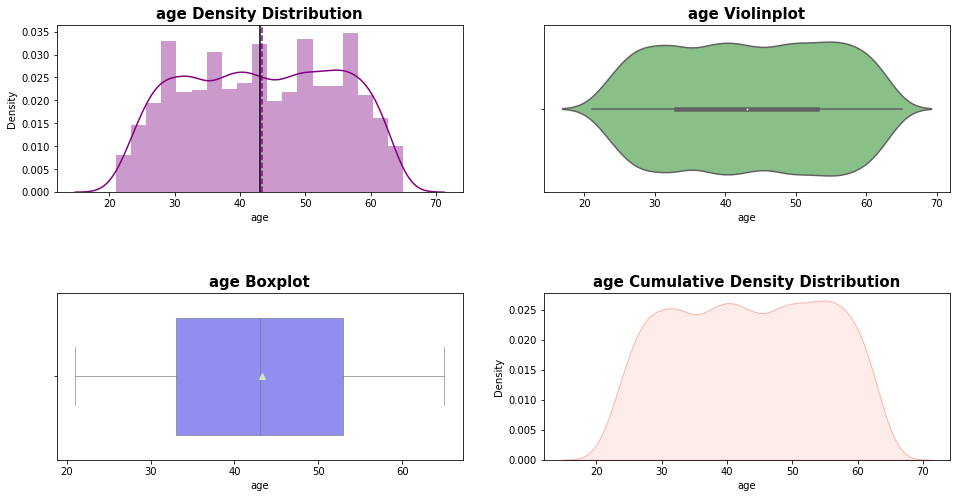

In [ ]:
plot_group('age')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


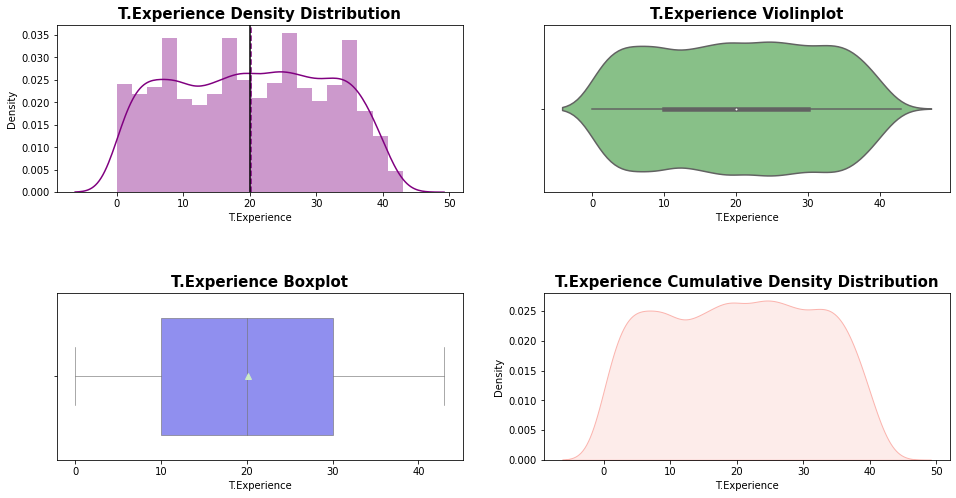

In [ ]:
plot_group('T.Experience')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


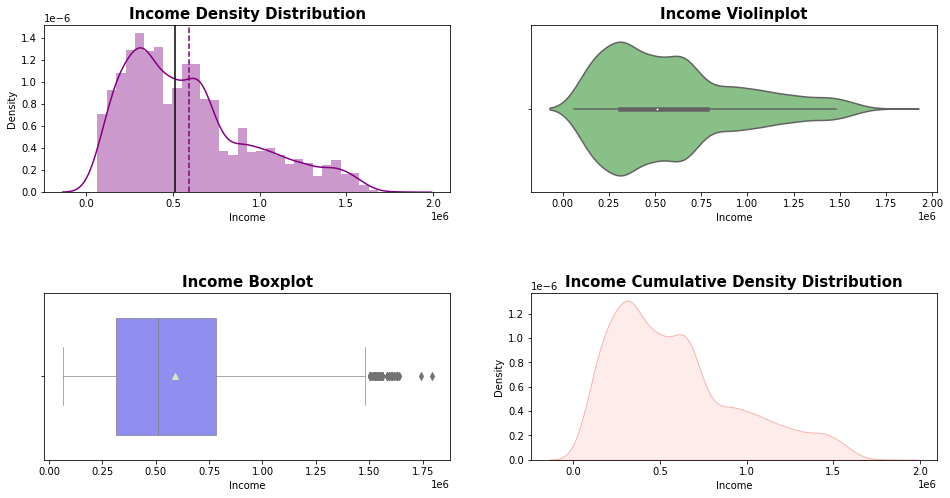

In [ ]:
plot_group('Income')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


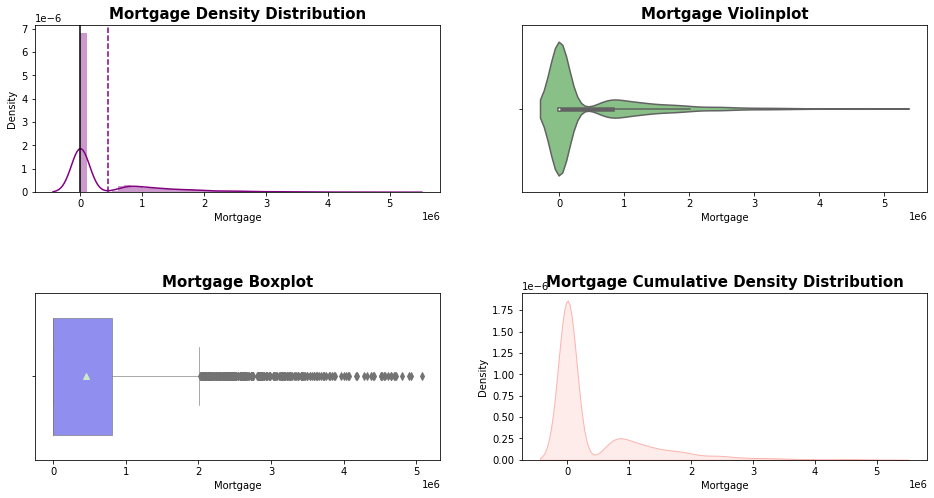

In [ ]:
plot_group('Mortgage')

In [ ]:
def bionary_plots(X):
    plt.figure(figsize=(8,6));   
    ax=sns.countplot(x = X , data=df ,  palette='rocket_r')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[X]))
        x = p.get_x() + p.get_width() / 2
        y = p.get_height() + 75
        plt.annotate(percentage, (x, y), ha='center', color='black', fontweight='bold')
        plt.xticks(color='black', fontsize='medium', ticks=[0,1], labels=['No', 'Yes'] , fontweight='bold')
    plt.tight_layout()
    plt.title(f'{X} Distribution by Percentage', color='black' , fontweight='bold' , fontsize = 15)
    plt.xlabel(f'{X} ' , fontweight='bold' , fontsize = 15)
    plt.ylabel('Count' , fontweight='bold' , fontsize = 15)
    plt.show()

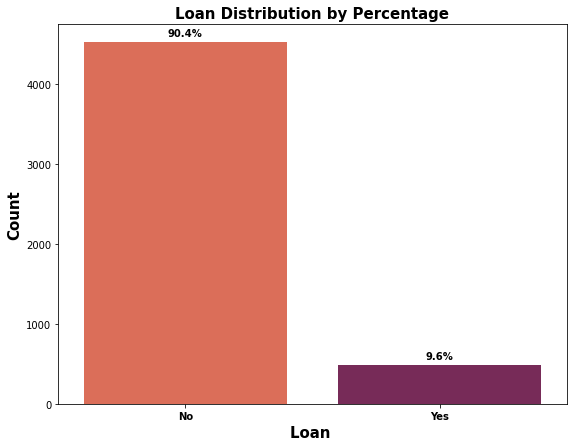

In [ ]:
bionary_plots('Loan')

In [ ]:
#only 9.6% BORROWED FROM BANK

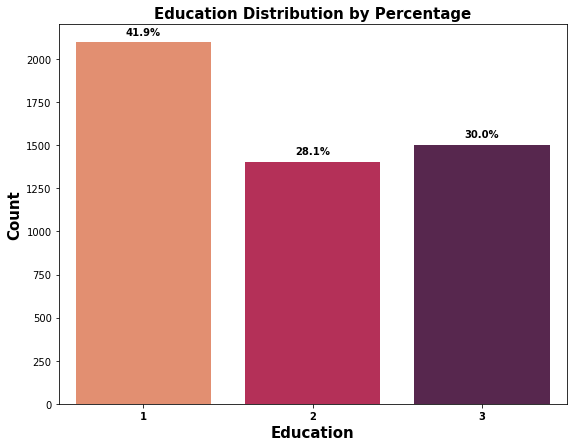

In [ ]:
plt.figure(figsize=(8,6));   
ax=sns.countplot(x='Education', data=df ,  palette='rocket_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Education']))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 45
    plt.annotate(percentage, (x, y), ha='center', color='black', fontweight='bold')
    plt.xticks(color='black', fontsize='medium' , fontweight='bold')
plt.tight_layout()
plt.title('Education Distribution by Percentage', color='black' , fontweight='bold' , fontsize = 15)
plt.xlabel('Education' , fontweight='bold' , fontsize = 15)
plt.ylabel('Count' , fontweight='bold' , fontsize = 15)
plt.show() 

In [ ]:
#Most of the customers have a low literacy rate of about 42%. 28% have average literacy rate and 30% have high literacy rate

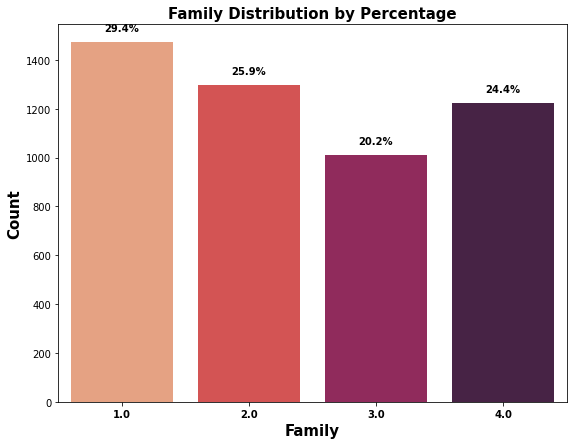

In [ ]:
plt.figure(figsize=(8,6));   
ax=sns.countplot(x='Fam members', data=df ,  palette='rocket_r')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df['Fam members']))
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 45
    plt.annotate(percentage, (x, y), ha='center', color='black', fontweight='bold')
    plt.xticks(color='black', fontsize='medium' , fontweight='bold')
plt.tight_layout()
plt.title('Family Distribution by Percentage', color='black' , fontweight='bold' , fontsize = 15)
plt.xlabel('Family' , fontweight='bold' , fontsize = 15)
plt.ylabel('Count' , fontweight='bold' , fontsize = 15)
plt.show()

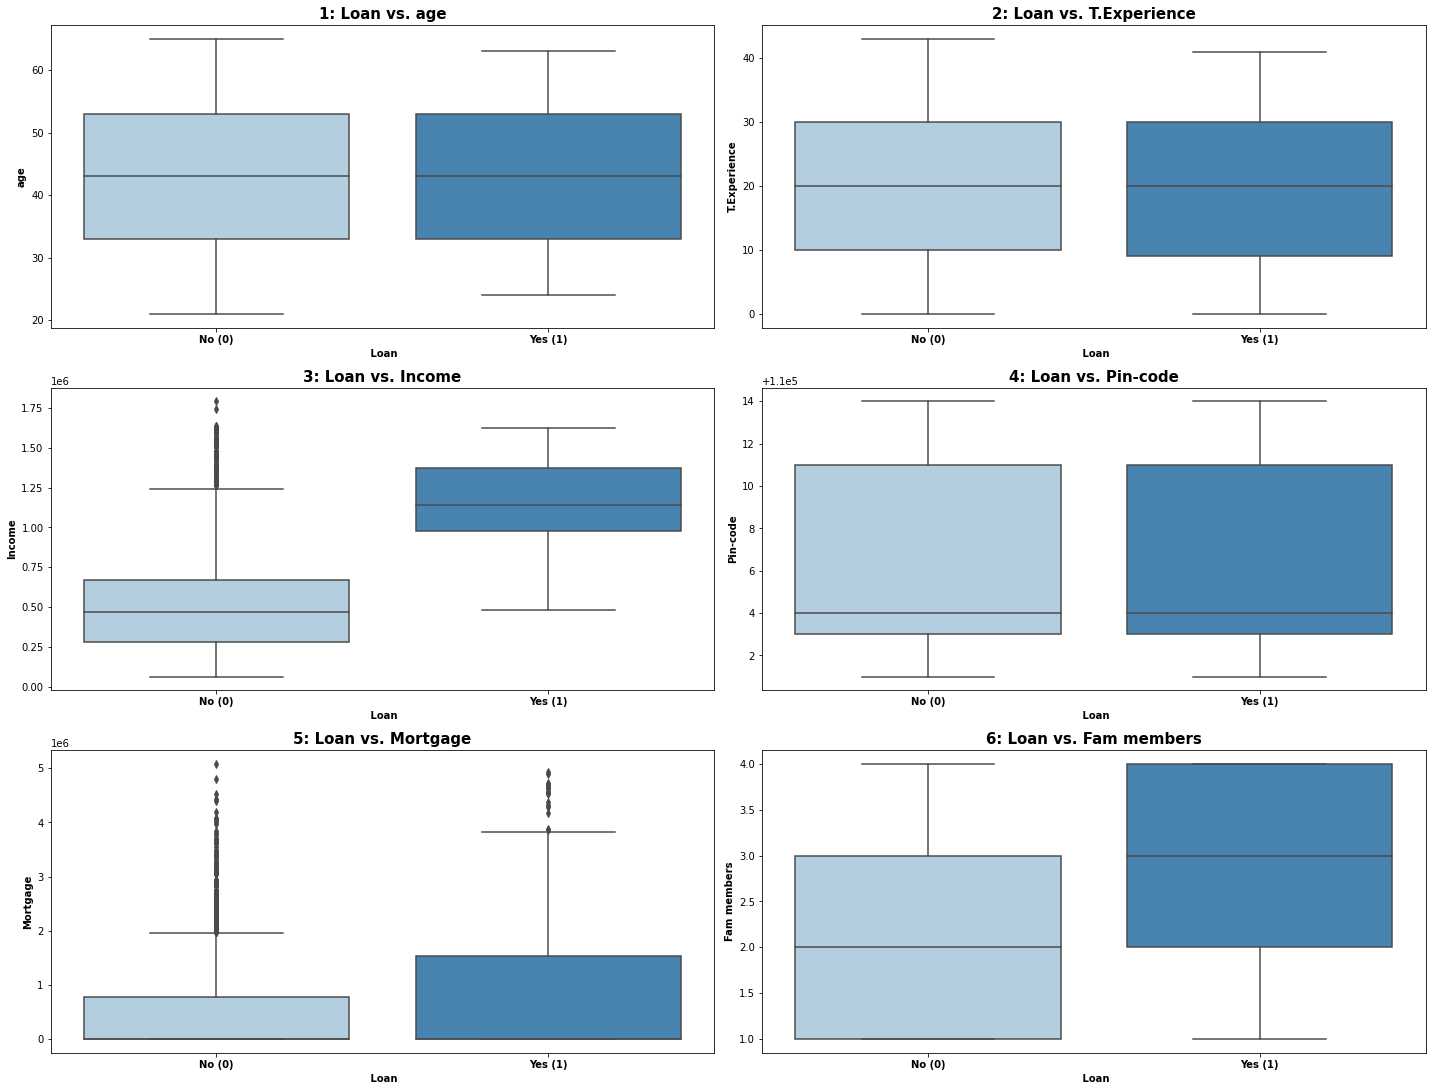

In [ ]:
numerical_features = ['age', 'T.Experience', 'Income', 'Pin-code', 'Mortgage', 'Fam members']

plt.figure(figsize=(20,40))

for i, col in enumerate(numerical_features):
    plt.subplot(8,2,i+1)
    sns.boxplot(data=df, x='Loan', y=col, orient='vertical', palette="Blues")
    plt.xticks(ticks=[0,1], labels=['No (0)', 'Yes (1)'] , fontweight='bold')
    plt.tight_layout()
    plt.title(str(i+1)+ ': Loan vs. ' + col, color='black' , fontweight='bold' , fontsize = 15)
    plt.xlabel(' Loan' , fontweight='bold' , fontsize = 10)
    plt.ylabel(f'{col}' , fontweight='bold' , fontsize = 10)

In [ ]:
# Failure to choose a loan based on age and experience
# People who have more income have borrowed more
# People who have 2 to 4 family members are more likely to get a loan
# People who had a higher mortgage got a loan

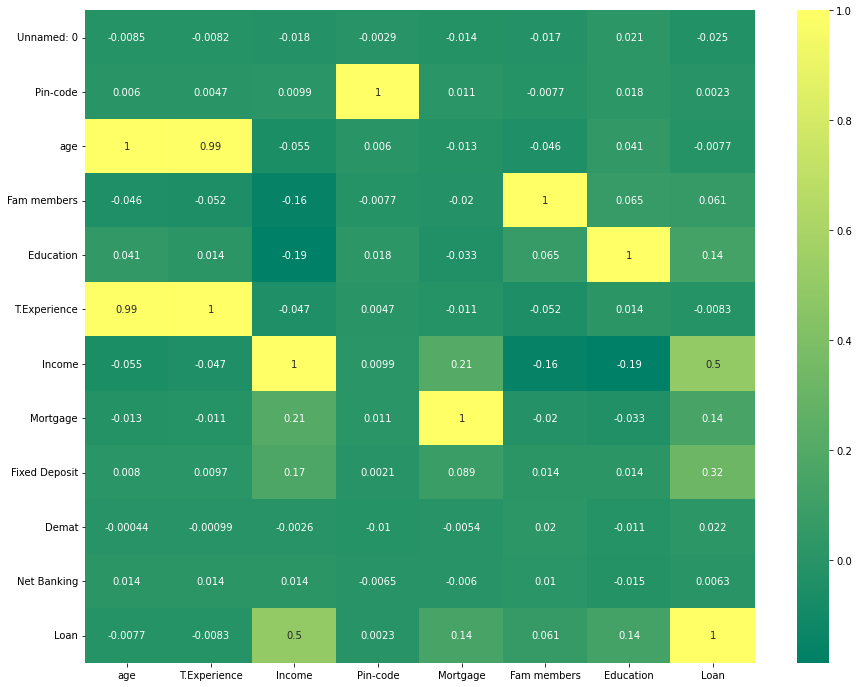

In [ ]:
# Plotting correlation heatmap of the features
plt.figure(figsize=(15 , 12))
corr = df.corr()
sns.heatmap(corr[['age', 'T.Experience', 'Income', 'Pin-code', 'Mortgage',
       'Fam members', 'Education', 'Loan']] ,annot=True,cmap='summer')             # heatmap of correlations
plt.show()


In [ ]:
df.columns

Index(['Unnamed: 0', 'Pin-code', 'age', 'Fam members', 'Education',
       'T.Experience', 'Income', 'Mortgage', 'Fixed Deposit', 'Demat',
       'Net Banking', 'Loan'],
      dtype='object')

**Train a Model** 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier


In [ ]:
X=df[['age', 'T.Experience', 'Income', 'Pin-code', 'Mortgage',
       'Fam members', 'Education']].values  #select features var

In [ ]:
y = df['Loan'].values.reshape(-1 , 1)   #select target var

In [ ]:
scaler = preprocessing.StandardScaler()               # scaleing data
X = scaler.fit(X).transform(X)

In [ ]:
# Separate data into train and test data

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=4)  

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3750, 7) (3750, 1)
Test set: (1250, 7) (1250, 1)


**1- Gaussian Naive Bayes**

Training Accuracy Score:  0.9181333333333334
Test Accuracy Score:  0.9312

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4520
           1       0.61      0.50      0.55       480

    accuracy                           0.92      5000
   macro avg       0.78      0.73      0.75      5000
weighted avg       0.92      0.92      0.92      5000



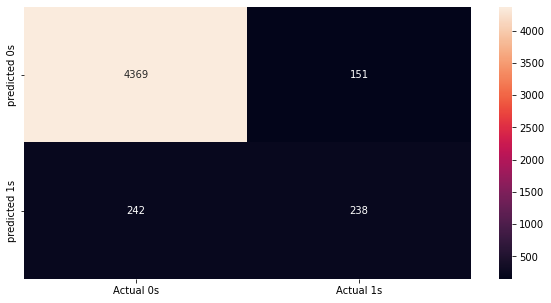

In [ ]:
from sklearn.naive_bayes import GaussianNB 

data_model = GaussianNB()

data_model.fit(X_train,y_train.ravel()) #ravel convert to an one dimensional array

naive_train_predict = data_model.predict(X_train)
naive_test_predict = data_model.predict(X_test)

print(f"Training Accuracy Score: ",metrics.accuracy_score(y_train,naive_train_predict))
print(f"Test Accuracy Score: ",metrics.accuracy_score(y_test,naive_test_predict))

print("\nClassification Report")
report_naiveBayes=classification_report(y,data_model.predict(X))
print(report_naiveBayes)

confusin_matix_Naive = metrics.confusion_matrix(y,data_model.predict(X))
confusin_matix_Naive = pd.DataFrame(confusin_matix_Naive,index=['predicted 0s' , 'predicted 1s'],
                              columns=['Actual 0s' , 'Actual 1s'])

plt.figure(figsize=(10,5))
sns.heatmap(confusin_matix_Naive,annot=True,fmt='g');
plt.show()

**2 - KNN**

Training Accuracy Score:  0.9730666666666666
Test Accuracy Score:  0.9648

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4520
           1       0.99      0.70      0.82       480

    accuracy                           0.97      5000
   macro avg       0.98      0.85      0.90      5000
weighted avg       0.97      0.97      0.97      5000



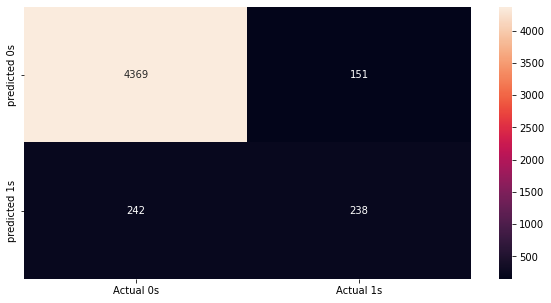

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 

data_model = KNeighborsClassifier()

data_model.fit(X_train,y_train.ravel()) #ravel convert to an one dimensional array

KNN_train_predict = data_model.predict(X_train)
KNN_test_predict = data_model.predict(X_test)

print(f"Training Accuracy Score: ",metrics.accuracy_score(y_train,KNN_train_predict))
print(f"Test Accuracy Score: ",metrics.accuracy_score(y_test,KNN_test_predict))

print("\nClassification Report")
report_KNN=classification_report(y,data_model.predict(X))
print(report_KNN)

confusin_matix_KNN = metrics.confusion_matrix(y,data_model.predict(X))
confusin_matix_KNN = pd.DataFrame(confusin_matix_Naive,index=['predicted 0s' , 'predicted 1s'],
                              columns=['Actual 0s' , 'Actual 1s'])

plt.figure(figsize=(10,5))
sns.heatmap(confusin_matix_KNN,annot=True,fmt='g');
plt.show()

In [ ]:
k = 20 
acc = np.zeros((k))
for i in range(1 , k+1):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train , y_train.ravel())
    y_pred = clf.predict(X_test)
    acc[i - 1] = metrics.accuracy_score(y_test , y_pred)
print(acc ,'\n\n')                                            # Display accuracy for k between 1 and 20
print(np.max(acc))                                            # Display maximum accuracy
print(np.min(acc))                                            # Display minimum accuracy


[0.9688 0.9544 0.9624 0.9608 0.9648 0.96   0.9648 0.9616 0.9632 0.96
 0.9632 0.96   0.9608 0.956  0.9584 0.9568 0.9584 0.9552 0.956  0.9528] 


0.9688
0.9528


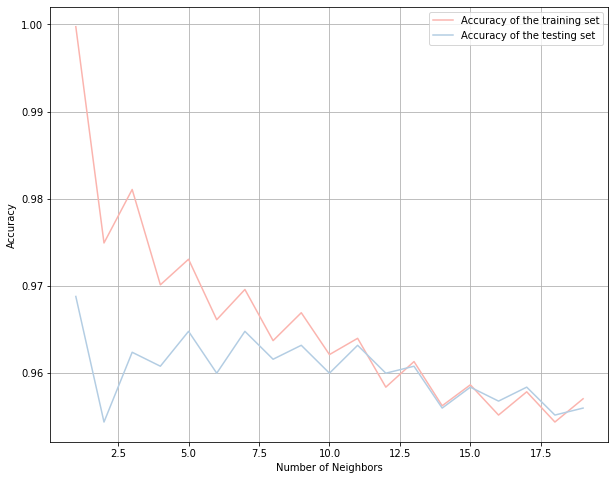

In [ ]:
trainin_acc = []
test_acc = []
neighbors_setting = range(1 , 20)
for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train , y_train.ravel())
    trainin_acc.append(knn.score(X_train , y_train))
    test_acc.append(knn.score(X_test , y_test))
plt.figure(figsize=(10 , 8))
plt.plot(neighbors_setting , trainin_acc , label = 'Accuracy of the training set')    
plt.plot(neighbors_setting , test_acc , label = 'Accuracy of the testing set')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [ ]:
print("\nNaive Bayes\n",report_naiveBayes)
print("\nKNN Classifier\n",report_KNN)


Naive Bayes
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      4520
           1       0.61      0.50      0.55       480

    accuracy                           0.92      5000
   macro avg       0.78      0.73      0.75      5000
weighted avg       0.92      0.92      0.92      5000


KNN Classifier
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      4520
           1       0.99      0.70      0.82       480

    accuracy                           0.97      5000
   macro avg       0.98      0.85      0.90      5000
weighted avg       0.97      0.97      0.97      5000



In [ ]:
# the best accuracy is for KNN Algorithm

**Predict New Customer** 

In [ ]:
data_model

KNeighborsClassifier()

In [ ]:
#X=df[['age', 'T.Experience', 'Income', 'Pin-code', 'Mortgage','Fam members', 'Education']]

In [ ]:
# first of all we scale new data
X = scaler.fit([[42 , 16 , 300000,636502,2300,6,3]]).transform([[42 , 16 , 300000,636502,2300,6,3]])

In [ ]:

print('Prediction based on KNN model : ' , data_model.predict(X))

Prediction based on KNN model :  [0]


In [ ]:
# 0 means no